# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

Задача: установить параметры, по которым можно определять рыночную стоимость объектов недвижимости в базе, предоставленой сервисом Яндекс Недвижимость, что позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

Для непосредственного анализа нам потребуются данные из следующих столбцов: locality_name, first_day_exposition, days_exposition, last_price, total_area, living_area, kitchen_area, rooms, floors_total, floor, city_centers_nearest, а также weekday, который нам предстоит создать. Для начала, попробуем вывести данные датасета на экран. Для корректного отображения нам необходимо задать условие sep='\t' и перевести данные столбца first_day_exposition в формат datetime:

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r'C:\Users\polin\Downloads\real_estate_data.csv', sep='\t')

data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S'
)

display(data.head(10))
data.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

### Вывод

После первой попытки вывода датасета на экран стало очевидно, что необходима предобработка данных: разделение столбцов при помощи sep='\t', перевод значений столбца first_day_exposition в формат datetime, а также обработка пропущенных значений и возможных дубликатов.

## Предобработка данных

Для начала, переименуем колонку расстояния до центра города, чтобы привести ее к общему с остальными названиями таблицы виду:

In [3]:
data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'}, inplace=True)

In [4]:
data['days_exposition'].isna().value_counts()

False    20518
True      3181
Name: days_exposition, dtype: int64

In [5]:
zero_days = data.query('days_exposition == 0')
zero_days

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [6]:
display('Доля пропущенных значений в days_exposition:', 3181/len(data)*100)

'Доля пропущенных значений в days_exposition:'

13.422507278788135

In [7]:
data['locality_name'].isna().value_counts()

False    23650
True        49
Name: locality_name, dtype: int64

In [8]:
display('Доля пропущенных значений в locality_name:', 49/len(data)*100)

'Доля пропущенных значений в locality_name:'

0.20675977889362418

In [9]:
data['city_centers_nearest'].isna().value_counts()

False    18180
True      5519
Name: city_centers_nearest, dtype: int64

In [10]:
display('Доля пропущенных значений в city_centers_nearest:', 5519/len(data)*100)

'Доля пропущенных значений в city_centers_nearest:'

23.28790244314106

Как мы видим, доля пропущеных значений в столбце с названиями населенных пунктов не превышает одного процента, поэтому можно удалить пропуски, но вот пропуски с количеством дней продажи и расстоянием до центра составляют 15% и 30% от общего объема данных. Поскольку, в столбце с количеством дней нет значений, равных нулю, можно предположить, что пропущенные значения - это квартиры, которые по-прежнему находятся в продаже на данный момент и, следовательно, не подходят для нашего анализа - поэтому, их также можно удалить.

In [11]:
data = data.dropna(subset=['days_exposition']).reset_index(drop=True)
data = data.dropna(subset=['locality_name']).reset_index(drop=True)
display(data.head(10))
data.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
1,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
2,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
3,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
4,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
5,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
6,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
7,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0
8,5,5050000.0,39.60,2017-11-16,1,2.67,12.0,20.30,3,NaN,...,8.50,NaN,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0
9,9,3300000.0,44.00,2018-08-27,2,NaN,5.0,31.00,4,False,...,6.00,1.0,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20470 entries, 0 to 20469
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20470 non-null  int64         
 1   last_price            20470 non-null  float64       
 2   total_area            20470 non-null  float64       
 3   first_day_exposition  20470 non-null  datetime64[ns]
 4   rooms                 20470 non-null  int64         
 5   ceiling_height        12037 non-null  float64       
 6   floors_total          20394 non-null  float64       
 7   living_area           18770 non-null  float64       
 8   floor                 20470 non-null  int64         
 9   is_apartment          2485 non-null   object        
 10  studio                20470 non-null  bool          
 11  open_plan             20470 non-null  bool          
 12  kitchen_area          18404 non-null  float64       
 13  balcony         

Сменим типы данных на целые числа (там, где речь идет об объектах, которые не могут исчисляться дробями), и заменим пропуски на 0 там, где это уместно (например, количество балконов или парков рядом); также, заменим на медиану пропуски в графе о количестве этажей - поскольку, пропущенных значений не много, это не сильно повлияет на данные в целом:

In [12]:
data['is_apartment'] = data['is_apartment'].astype('bool')
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()).round(1)
data['days_exposition'] = data['days_exposition'].astype('int')
#data['last_price'] = data['last_price']/1000000
columns_to_fill = ['balcony', 'parks_around3000', 'ponds_around3000']
for column in columns_to_fill:
    data[column] = data[column].fillna(0).astype('int')
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].mean()).astype('int')
display(data.head(10))
data.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,7,3350000.0,40.40,2018-12-04,1,2.6,11,18.60,1,True,...,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81
1,10,5196000.0,56.00,2015-08-20,2,2.6,5,34.30,4,True,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558
2,0,64900000.0,159.00,2015-07-24,3,2.6,14,NaN,9,True,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424
3,2,10000000.0,100.00,2018-06-19,2,3.0,14,32.00,13,True,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121
4,10,2890000.0,30.40,2018-09-10,1,2.6,12,14.40,5,True,...,9.10,0,городской посёлок Янино-1,NaN,NaN,0,NaN,0,NaN,55
5,6,3700000.0,37.30,2017-11-02,1,2.6,26,10.60,6,True,...,14.40,1,посёлок Парголово,52996.0,19143.0,0,NaN,0,NaN,155
6,20,2900000.0,33.16,2018-05-23,1,2.6,27,15.43,26,True,...,8.81,0,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,189
7,18,5400000.0,61.00,2017-02-26,3,2.5,9,43.60,7,True,...,6.50,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289
8,5,5050000.0,39.60,2017-11-16,1,2.7,12,20.30,3,True,...,8.50,0,Санкт-Петербург,38357.0,13878.0,1,310.0,2,553.0,137
9,9,3300000.0,44.00,2018-08-27,2,2.6,5,31.00,4,False,...,6.00,1,Ломоносов,48252.0,51677.0,0,NaN,0,NaN,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20470 entries, 0 to 20469
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20470 non-null  int64         
 1   last_price            20470 non-null  float64       
 2   total_area            20470 non-null  float64       
 3   first_day_exposition  20470 non-null  datetime64[ns]
 4   rooms                 20470 non-null  int64         
 5   ceiling_height        20470 non-null  float64       
 6   floors_total          20470 non-null  int32         
 7   living_area           18770 non-null  float64       
 8   floor                 20470 non-null  int64         
 9   is_apartment          20470 non-null  bool          
 10  studio                20470 non-null  bool          
 11  open_plan             20470 non-null  bool          
 12  kitchen_area          18404 non-null  float64       
 13  balcony         

### Вывод

За счет корректировки типа, заполнения и удаления пропусков, а также переименования столбцов, данные стали чище, что упрощает дальнейшую работу.

## Расчёты и добавление результатов в таблицу

Добавим в таблицу столбцы с днем недели, категорией этажа, ценой за метр квадратный, а также отношением площади кухни и жилого пространства к общей:

In [13]:
data['weekday_index'] = data['first_day_exposition'].dt.dayofweek

def weekday (day_index):
    if day_index == 0:
        return 'Monday'
    if day_index == 1:
        return 'Tuesday'
    if day_index == 2:
        return 'Wednesday'
    if day_index == 3:
        return 'Thursday'
    if day_index == 4:
        return 'Friday'
    if day_index == 5:
        return 'Sathurday'
    return 'Sunday'

data['weekday'] = data['weekday_index'].apply(weekday)

def floor_cat(row):
    
    floor = row['floor']
    floors_total = row['floors_total']
    
    if floor == 1:
        return 'First'
    if floor == floors_total:
        return 'Last'
    return 'Other'

data['floor_cat'] = data.apply(floor_cat, axis=1)
data['price_sqm'] = (data['last_price']/data['total_area'])
data['living_to_total'] = (data['living_area']/data['total_area']).round(1)
data['kitchen_to_total'] = (data['kitchen_area']/data['total_area']).round(1)
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,weekday_index,weekday,floor_cat,price_sqm,living_to_total,kitchen_to_total
0,7,3350000.0,40.4,2018-12-04,1,2.6,11,18.6,1,True,...,NaN,0,NaN,81,1,Tuesday,First,82920.792079,0.5,0.3
1,10,5196000.0,56.0,2015-08-20,2,2.6,5,34.3,4,True,...,90.0,2,574.0,558,3,Thursday,Other,92785.714286,0.6,0.1
2,0,64900000.0,159.0,2015-07-24,3,2.6,14,NaN,9,True,...,84.0,3,234.0,424,4,Friday,Other,408176.100629,NaN,NaN
3,2,10000000.0,100.0,2018-06-19,2,3.0,14,32.0,13,True,...,112.0,1,48.0,121,1,Tuesday,Other,100000.000000,0.3,0.4
4,10,2890000.0,30.4,2018-09-10,1,2.6,12,14.4,5,True,...,NaN,0,NaN,55,0,Monday,Other,95065.789474,0.5,0.3


Для наглядности сгруппируем полученные данные в отдельный датасет:

In [14]:
filtered = data[['locality_name', 'first_day_exposition', 'weekday', 'weekday_index', 'days_exposition', 'last_price', 'price_sqm', 'ceiling_height', 'total_area', 'living_area', 'living_to_total', 'kitchen_area', 'kitchen_to_total', 'rooms', 'floors_total', 'floor', 'floor_cat', 'studio', 'open_plan', 'city_centers_nearest']]
display(filtered.head(5))
display(filtered.info())

,locality_name,first_day_exposition,weekday,weekday_index,days_exposition,last_price,price_sqm,ceiling_height,total_area,living_area,living_to_total,kitchen_area,kitchen_to_total,rooms,floors_total,floor,floor_cat,studio,open_plan,city_centers_nearest
0,посёлок Шушары,2018-12-04,Tuesday,1,81,3350000.0,82920.792079,2.6,40.4,18.6,0.5,11.0,0.3,1,11,1,First,False,False,18603.0
1,Санкт-Петербург,2015-08-20,Thursday,3,558,5196000.0,92785.714286,2.6,56.0,34.3,0.6,8.3,0.1,2,5,4,Other,False,False,13933.0
2,Санкт-Петербург,2015-07-24,Friday,4,424,64900000.0,408176.100629,2.6,159.0,NaN,NaN,NaN,NaN,3,14,9,Other,False,False,6800.0
3,Санкт-Петербург,2018-06-19,Tuesday,1,121,10000000.0,100000.000000,3.0,100.0,32.0,0.3,41.0,0.4,2,14,13,Other,False,False,8098.0
4,городской посёлок Янино-1,2018-09-10,Monday,0,55,2890000.0,95065.789474,2.6,30.4,14.4,0.5,9.1,0.3,1,12,5,Other,False,False,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20470 entries, 0 to 20469
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   locality_name         20470 non-null  object        
 1   first_day_exposition  20470 non-null  datetime64[ns]
 2   weekday               20470 non-null  object        
 3   weekday_index         20470 non-null  int64         
 4   days_exposition       20470 non-null  int32         
 5   last_price            20470 non-null  float64       
 6   price_sqm             20470 non-null  float64       
 7   ceiling_height        20470 non-null  float64       
 8   total_area            20470 non-null  float64       
 9   living_area           18770 non-null  float64       
 10  living_to_total       18770 non-null  float64       
 11  kitchen_area          18404 non-null  float64       
 12  kitchen_to_total      18404 non-null  float64       
 13  rooms           

None

### Вывод

Для наглядности и удобства презентации данные были собраны в датасет, включающий в себя только нужные для работы и анализа колонки.

## Исследовательский анализ данных

#### Анализ данных через построение гистаграмм и описания распределений

Для обзора общих тенденций в имеющейся информации, построим следующие гистограммы:

count    20470.000000
mean        58.845355
std         34.080771
min         12.000000
25%         39.500000
50%         50.800000
75%         67.800000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:ylabel='Frequency'>

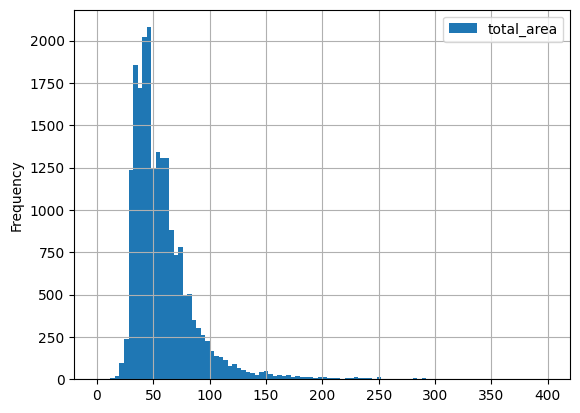

In [15]:
display(filtered['total_area'].describe())
filtered.plot(y='total_area', kind='hist', range=(0, 400), bins=100, grid=True)

count    2.047000e+04
mean     6.264805e+06
std      1.087355e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.500000e+06
75%      6.500000e+06
max      7.630000e+08
Name: last_price, dtype: float64

<AxesSubplot:ylabel='Frequency'>

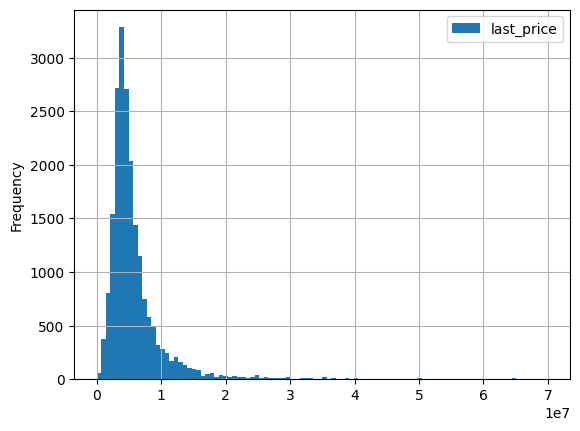

In [16]:
display(filtered['last_price'].describe())
filtered.plot(y='last_price', kind='hist', range=(0,70000000), bins=100, grid=True)

count    2.047000e+04
mean     9.803190e+04
std      4.776190e+04
min      1.118349e+02
25%      7.647059e+04
50%      9.407651e+04
75%      1.121752e+05
max      1.907500e+06
Name: price_sqm, dtype: float64

<AxesSubplot:ylabel='Frequency'>

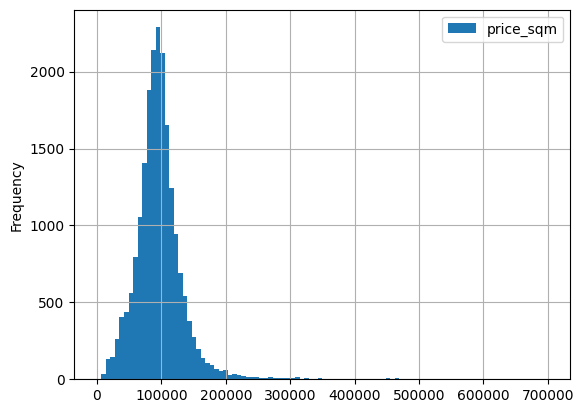

In [17]:
display(filtered['price_sqm'].describe())
filtered.plot(y='price_sqm', kind='hist', range=(0,700000), bins=100, grid=True)

count    20470.000000
mean         2.023889
std          1.054972
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

<AxesSubplot:ylabel='Frequency'>

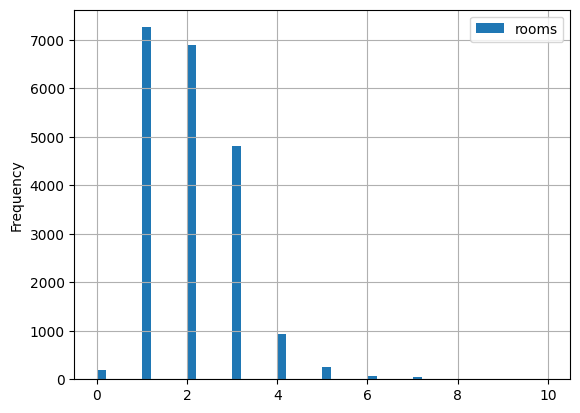

In [18]:
display(filtered['rooms'].describe())
filtered.plot(y='rooms', kind='hist', range=(0,10), bins=50, grid=True)

count    20470.000000
mean         2.697601
std          0.972957
min          1.000000
25%          2.600000
50%          2.600000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:ylabel='Frequency'>

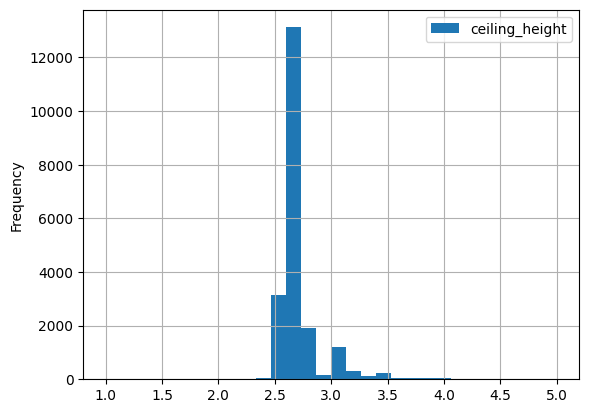

In [19]:
display(filtered['ceiling_height'].describe())
filtered.plot(y='ceiling_height', kind='hist', range=(1,5), bins=30, grid=True)

На гистограммах можно замтить наличие выбрсов. Рассмотрим значения подробнее:

In [20]:
display(filtered['rooms'].value_counts())
display(filtered['ceiling_height'].value_counts().sort_values(ascending=False))

1     7262
2     6897
3     4803
4      936
5      252
0      183
6       76
7       37
8       11
9        4
14       2
10       2
15       1
11       1
19       1
16       1
12       1
Name: rooms, dtype: int64

2.6      11622
2.5       3130
2.8       1900
2.7       1504
3.0        977
3.2        317
3.1        225
2.9        167
3.3        135
3.5        116
3.4        103
3.6         52
4.0         33
2.4         33
3.7         31
3.8         30
3.9         16
4.2         12
2.0          8
27.0         7
4.4          6
25.0         5
2.3          5
4.1          5
4.5          4
8.0          3
2.2          2
4.7          2
5.3          1
5.2          1
5.0          1
4.8          1
24.0         1
26.0         1
1.2          1
8.3          1
4.6          1
14.0         1
5.6          1
1.8          1
6.0          1
22.6         1
5.8          1
27.5         1
1.0          1
4.9          1
10.3         1
100.0        1
Name: ceiling_height, dtype: int64

In [21]:
big_area = filtered.query('total_area >= 300')
display(big_area.head(10))
big_area.info()

,locality_name,first_day_exposition,weekday,weekday_index,days_exposition,last_price,price_sqm,ceiling_height,total_area,living_area,living_to_total,kitchen_area,kitchen_to_total,rooms,floors_total,floor,floor_cat,studio,open_plan,city_centers_nearest
133,Санкт-Петербург,2017-07-07,Friday,4,62,96000000.0,302839.116719,3.5,317.0,183.0,0.6,NaN,NaN,4,3,3,Last,False,False,1771.0
564,Санкт-Петербург,2017-10-04,Wednesday,2,391,49950000.0,103223.806572,3.2,483.9,312.5,0.6,26.4,0.1,7,6,4,Other,False,False,945.0
684,Санкт-Петербург,2018-05-22,Tuesday,1,342,135000000.0,435483.870968,3.3,310.0,250.0,0.8,50.0,0.2,4,5,2,Other,False,False,7251.0
751,Санкт-Петербург,2017-12-23,Sathurday,5,418,25000000.0,68870.523416,3.2,363.0,222.0,0.6,16.6,0.0,14,5,4,Other,False,False,7950.0
946,Санкт-Петербург,2017-07-10,Monday,0,259,75000000.0,232198.142415,4.0,323.0,255.7,0.8,66.0,0.2,5,5,4,Other,False,False,594.0
1206,Санкт-Петербург,2015-01-21,Wednesday,2,719,59800000.0,149874.686717,5.6,399.0,NaN,NaN,NaN,NaN,5,6,6,Last,False,False,6934.0
1297,Санкт-Петербург,2018-11-27,Tuesday,1,46,65000000.0,178571.428571,3.9,364.0,250.0,0.7,20.0,0.1,7,6,3,Other,False,False,3254.0
1923,Санкт-Петербург,2015-07-24,Friday,4,599,130278280.0,428546.973684,3.1,304.0,NaN,NaN,NaN,NaN,5,9,7,Other,False,False,5913.0
2219,Санкт-Петербург,2017-10-16,Monday,0,406,30900000.0,91258.121677,3.9,338.6,230.0,0.7,20.0,0.1,7,6,4,Other,False,False,5641.0
4335,Пушкин,2017-08-17,Thursday,3,15,35000000.0,92105.263158,2.6,380.0,198.0,0.5,50.0,0.1,6,3,2,Other,False,False,30643.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 133 to 19423
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   locality_name         49 non-null     object        
 1   first_day_exposition  49 non-null     datetime64[ns]
 2   weekday               49 non-null     object        
 3   weekday_index         49 non-null     int64         
 4   days_exposition       49 non-null     int32         
 5   last_price            49 non-null     float64       
 6   price_sqm             49 non-null     float64       
 7   ceiling_height        49 non-null     float64       
 8   total_area            49 non-null     float64       
 9   living_area           43 non-null     float64       
 10  living_to_total       43 non-null     float64       
 11  kitchen_area          40 non-null     float64       
 12  kitchen_to_total      40 non-null     float64       
 13  rooms            

In [22]:
big_price = filtered.query('last_price >= 40000000')
display(big_price.head(10))
big_price.info()

,locality_name,first_day_exposition,weekday,weekday_index,days_exposition,last_price,price_sqm,ceiling_height,total_area,living_area,living_to_total,kitchen_area,kitchen_to_total,rooms,floors_total,floor,floor_cat,studio,open_plan,city_centers_nearest
2,Санкт-Петербург,2015-07-24,Friday,4,424,64900000.0,408176.100629,2.6,159.0,NaN,NaN,NaN,NaN,3,14,9,Other,False,False,6800.0
45,Санкт-Петербург,2017-10-17,Tuesday,1,541,45000000.0,279503.105590,3.2,161.0,38.0,0.2,50.0,0.3,3,8,4,Other,False,False,6589.0
133,Санкт-Петербург,2017-07-07,Friday,4,62,96000000.0,302839.116719,3.5,317.0,183.0,0.6,NaN,NaN,4,3,3,Last,False,False,1771.0
345,Санкт-Петербург,2014-12-09,Tuesday,1,594,40662000.0,269284.768212,2.6,151.0,85.0,0.6,23.0,0.2,3,8,3,Other,False,False,5975.0
392,Санкт-Петербург,2015-06-11,Thursday,3,578,66571000.0,237499.108098,5.2,280.3,159.5,0.6,21.1,0.1,6,8,7,Other,False,False,6655.0
420,Санкт-Петербург,2017-12-05,Tuesday,1,14,95000000.0,439814.814815,3.0,216.0,86.0,0.4,77.0,0.4,4,5,4,Other,False,False,436.0
436,Санкт-Петербург,2016-06-26,Sunday,6,416,90000000.0,400000.000000,2.6,225.0,134.0,0.6,19.5,0.1,6,4,2,Other,False,False,5720.0
564,Санкт-Петербург,2017-10-04,Wednesday,2,391,49950000.0,103223.806572,3.2,483.9,312.5,0.6,26.4,0.1,7,6,4,Other,False,False,945.0
684,Санкт-Петербург,2018-05-22,Tuesday,1,342,135000000.0,435483.870968,3.3,310.0,250.0,0.8,50.0,0.2,4,5,2,Other,False,False,7251.0
712,Санкт-Петербург,2018-11-06,Tuesday,1,35,46950000.0,284545.454545,3.0,165.0,87.0,0.5,25.0,0.2,5,3,3,Last,False,False,5720.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 2 to 20362
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   locality_name         151 non-null    object        
 1   first_day_exposition  151 non-null    datetime64[ns]
 2   weekday               151 non-null    object        
 3   weekday_index         151 non-null    int64         
 4   days_exposition       151 non-null    int32         
 5   last_price            151 non-null    float64       
 6   price_sqm             151 non-null    float64       
 7   ceiling_height        151 non-null    float64       
 8   total_area            151 non-null    float64       
 9   living_area           133 non-null    float64       
 10  living_to_total       133 non-null    float64       
 11  kitchen_area          131 non-null    float64       
 12  kitchen_to_total      131 non-null    float64       
 13  rooms             

In [23]:
big_price_sqm = filtered.query('price_sqm >= 400000')
display(big_price_sqm.head(10))
big_price_sqm.info()

,locality_name,first_day_exposition,weekday,weekday_index,days_exposition,last_price,price_sqm,ceiling_height,total_area,living_area,living_to_total,kitchen_area,kitchen_to_total,rooms,floors_total,floor,floor_cat,studio,open_plan,city_centers_nearest
2,Санкт-Петербург,2015-07-24,Friday,4,424,64900000.0,4.081761e+05,2.6,159.0,NaN,NaN,NaN,NaN,3,14,9,Other,False,False,6800.0
420,Санкт-Петербург,2017-12-05,Tuesday,1,14,95000000.0,4.398148e+05,3.0,216.0,86.0,0.4,77.0,0.4,4,5,4,Other,False,False,436.0
436,Санкт-Петербург,2016-06-26,Sunday,6,416,90000000.0,4.000000e+05,2.6,225.0,134.0,0.6,19.5,0.1,6,4,2,Other,False,False,5720.0
684,Санкт-Петербург,2018-05-22,Tuesday,1,342,135000000.0,4.354839e+05,3.3,310.0,250.0,0.8,50.0,0.2,4,5,2,Other,False,False,7251.0
1039,Санкт-Петербург,2018-06-01,Friday,4,316,118000000.0,4.060564e+05,3.8,290.6,188.7,0.6,22.0,0.1,6,6,3,Other,False,False,6224.0
1132,Санкт-Петербург,2018-07-12,Thursday,3,225,120000000.0,4.285714e+05,4.7,280.0,162.0,0.6,30.0,0.1,5,4,3,Other,False,False,4247.0
1249,Санкт-Петербург,2018-04-04,Wednesday,2,233,330000000.0,1.736842e+06,3.5,190.0,95.0,0.5,40.0,0.2,3,7,5,Other,False,False,1197.0
1661,Санкт-Петербург,2017-01-24,Tuesday,1,174,125000000.0,5.567929e+05,2.6,224.5,163.5,0.7,30.0,0.1,4,4,3,Other,False,False,2335.0
1675,Санкт-Петербург,2015-12-17,Thursday,3,481,55800000.0,4.464000e+05,3.2,125.0,50.0,0.4,20.0,0.2,2,9,2,Other,False,False,2389.0
1923,Санкт-Петербург,2015-07-24,Friday,4,599,130278280.0,4.285470e+05,3.1,304.0,NaN,NaN,NaN,NaN,5,9,7,Other,False,False,5913.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 2 to 20362
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   locality_name         63 non-null     object        
 1   first_day_exposition  63 non-null     datetime64[ns]
 2   weekday               63 non-null     object        
 3   weekday_index         63 non-null     int64         
 4   days_exposition       63 non-null     int32         
 5   last_price            63 non-null     float64       
 6   price_sqm             63 non-null     float64       
 7   ceiling_height        63 non-null     float64       
 8   total_area            63 non-null     float64       
 9   living_area           56 non-null     float64       
 10  living_to_total       56 non-null     float64       
 11  kitchen_area          56 non-null     float64       
 12  kitchen_to_total      56 non-null     float64       
 13  rooms              

Посмотрим на данные о продаже квартир:

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:ylabel='Frequency'>

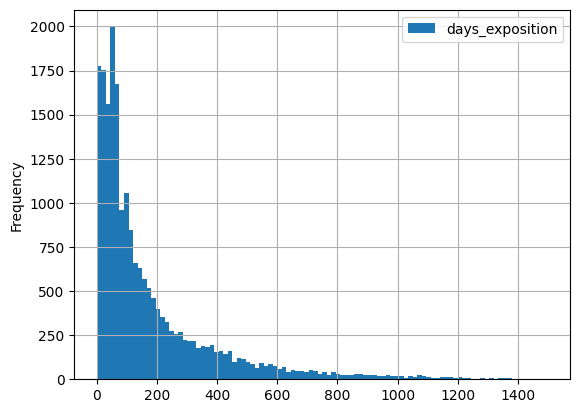

In [24]:
display(filtered['days_exposition'].describe())
filtered.plot(y='days_exposition', kind='hist', range=(0, 1500), bins=100, grid=True)

Медиана продаж равна 96 дням, в то время, как среднее - 182. Это обусловлено наличием длинного "хвоста" значений, тянущихся вплоть до 1572 дней, в то время, как большая часть продаж происходит в срок до 200 дней. Поэтому, часть хвоста лучше обрезать:

In [25]:
long_exp = filtered.query('days_exposition >= 800')
display(long_exp.head(10))
display(filtered['days_exposition'].describe())
long_exp.info()

,locality_name,first_day_exposition,weekday,weekday_index,days_exposition,last_price,price_sqm,ceiling_height,total_area,living_area,living_to_total,kitchen_area,kitchen_to_total,rooms,floors_total,floor,floor_cat,studio,open_plan,city_centers_nearest
40,Петергоф,2015-07-08,Wednesday,2,987,22000000.0,135970.333745,2.8,161.8,80.9,0.5,17.6,0.1,4,4,2,Other,False,False,30605.0
86,Санкт-Петербург,2014-12-10,Wednesday,2,831,11700000.0,146250.000000,2.6,80.0,55.1,0.7,11.0,0.1,3,5,3,Other,False,False,8767.0
95,Пушкин,2015-12-08,Tuesday,1,1048,7497600.0,119961.600000,2.6,62.5,35.5,0.6,9.5,0.2,2,5,5,Last,False,False,26670.0
124,Санкт-Петербург,2015-09-21,Monday,0,807,8290000.0,107662.337662,2.8,77.0,40.0,0.5,10.0,0.1,2,16,5,Other,False,False,7384.0
169,Санкт-Петербург,2015-11-12,Thursday,3,992,10880000.0,88383.428107,3.2,123.1,89.0,0.7,11.0,0.1,6,5,2,Other,False,False,3369.0
266,Санкт-Петербург,2015-03-19,Thursday,3,974,4850000.0,81239.530988,2.5,59.7,47.4,0.8,6.4,0.1,3,5,4,Other,False,False,15599.0
275,Санкт-Петербург,2016-04-20,Wednesday,2,900,7100000.0,142000.000000,2.6,50.0,31.5,0.6,5.0,0.1,3,5,1,First,False,False,2043.0
294,Санкт-Петербург,2015-05-08,Friday,4,1292,5990000.0,137701.149425,3.0,43.5,25.0,0.6,9.4,0.2,1,5,4,Other,False,False,10278.0
333,Санкт-Петербург,2014-12-09,Tuesday,1,1345,12789000.0,161273.644388,3.0,79.3,43.1,0.5,17.6,0.2,2,8,5,Other,False,False,11096.0
370,Петергоф,2015-02-24,Tuesday,1,1273,3350000.0,90540.540541,2.6,37.0,17.8,0.5,8.4,0.2,1,6,6,Last,False,False,34044.0


count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 593 entries, 40 to 20451
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   locality_name         593 non-null    object        
 1   first_day_exposition  593 non-null    datetime64[ns]
 2   weekday               593 non-null    object        
 3   weekday_index         593 non-null    int64         
 4   days_exposition       593 non-null    int32         
 5   last_price            593 non-null    float64       
 6   price_sqm             593 non-null    float64       
 7   ceiling_height        593 non-null    float64       
 8   total_area            593 non-null    float64       
 9   living_area           556 non-null    float64       
 10  living_to_total       556 non-null    float64       
 11  kitchen_area          557 non-null    float64       
 12  kitchen_to_total      557 non-null    float64       
 13  rooms            

Создадим новый датафрейм по набору срезов, исключающих значения, принятые за аномальные - большое количество комнат, очень низкие или высокие потолки, чрезвычайно большая площадь:

In [26]:
good = filtered.query('rooms < 6 and 2.4 <= ceiling_height <= 3.3 and total_area < 300 and last_price > 1000000').reset_index(drop=True)
display(good)
good.info()

,locality_name,first_day_exposition,weekday,weekday_index,days_exposition,last_price,price_sqm,ceiling_height,total_area,living_area,living_to_total,kitchen_area,kitchen_to_total,rooms,floors_total,floor,floor_cat,studio,open_plan,city_centers_nearest
0,посёлок Шушары,2018-12-04,Tuesday,1,81,3350000.0,82920.792079,2.6,40.40,18.6,0.5,11.0,0.3,1,11,1,First,False,False,18603.0
1,Санкт-Петербург,2015-08-20,Thursday,3,558,5196000.0,92785.714286,2.6,56.00,34.3,0.6,8.3,0.1,2,5,4,Other,False,False,13933.0
2,Санкт-Петербург,2015-07-24,Friday,4,424,64900000.0,408176.100629,2.6,159.00,NaN,NaN,NaN,NaN,3,14,9,Other,False,False,6800.0
3,Санкт-Петербург,2018-06-19,Tuesday,1,121,10000000.0,100000.000000,3.0,100.00,32.0,0.3,41.0,0.4,2,14,13,Other,False,False,8098.0
4,городской посёлок Янино-1,2018-09-10,Monday,0,55,2890000.0,95065.789474,2.6,30.40,14.4,0.5,9.1,0.3,1,12,5,Other,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19705,Санкт-Петербург,2016-10-13,Thursday,3,519,9470000.0,129903.978052,2.8,72.90,40.3,0.6,10.6,0.1,2,25,7,Other,False,False,4489.0
19706,Тихвин,2017-07-07,Friday,4,413,1350000.0,45000.000000,2.6,30.00,17.5,0.6,6.0,0.2,1,5,4,Other,False,False,NaN
19707,Петергоф,2016-08-05,Friday,4,239,4600000.0,73717.948718,2.6,62.40,40.0,0.6,8.0,0.1,3,9,8,Other,False,False,34104.0
19708,Тосно,2018-01-15,Monday,0,45,3100000.0,52542.372881,2.6,59.00,38.0,0.6,8.5,0.1,3,5,4,Other,False,False,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19710 entries, 0 to 19709
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   locality_name         19710 non-null  object        
 1   first_day_exposition  19710 non-null  datetime64[ns]
 2   weekday               19710 non-null  object        
 3   weekday_index         19710 non-null  int64         
 4   days_exposition       19710 non-null  int32         
 5   last_price            19710 non-null  float64       
 6   price_sqm             19710 non-null  float64       
 7   ceiling_height        19710 non-null  float64       
 8   total_area            19710 non-null  float64       
 9   living_area           18093 non-null  float64       
 10  living_to_total       18093 non-null  float64       
 11  kitchen_area          17752 non-null  float64       
 12  kitchen_to_total      17752 non-null  float64       
 13  rooms           

count    19710.000000
mean        56.649573
std         26.011795
min         12.000000
25%         39.200000
50%         50.000000
75%         66.500000
max        295.000000
Name: total_area, dtype: float64

<AxesSubplot:ylabel='Frequency'>

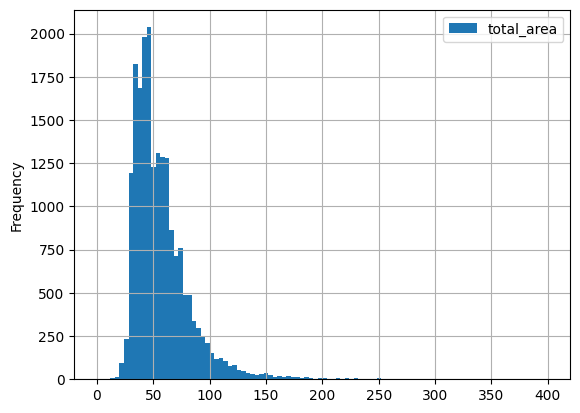

In [27]:
display(good['total_area'].describe())
good.plot(y='total_area', kind='hist', range=(0, 400), bins=100, grid=True)


count    1.971000e+04
mean     5.774440e+06
std      5.890729e+06
min      1.010000e+06
25%      3.400000e+06
50%      4.500000e+06
75%      6.300000e+06
max      1.908700e+08
Name: last_price, dtype: float64

<AxesSubplot:ylabel='Frequency'>

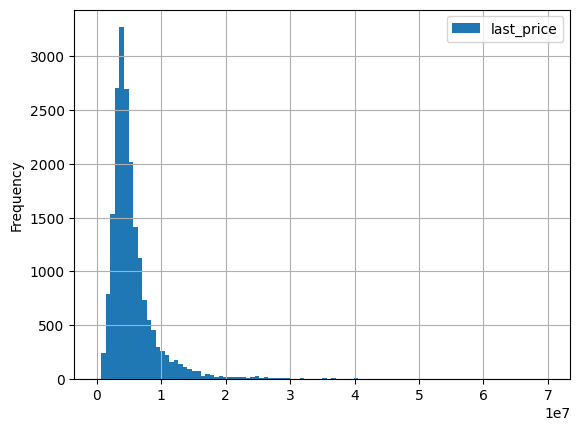

In [28]:
display(good['last_price'].describe())
good.plot(y='last_price', kind='hist', range=(0,70000000), bins=100, grid=True)

count    19710.000000
mean         1.973364
std          0.944903
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64

<AxesSubplot:ylabel='Frequency'>

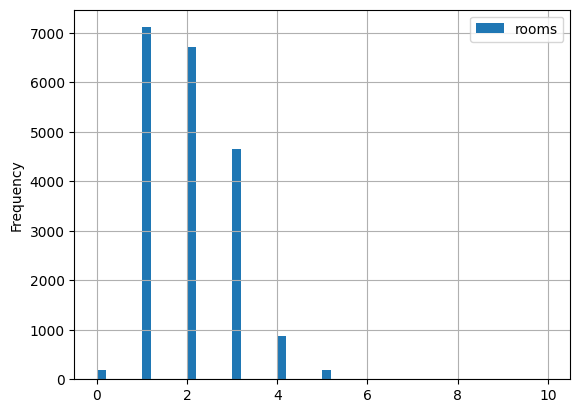

In [29]:
display(good['rooms'].describe())
good.plot(y='rooms', kind='hist', range=(0,10), bins=50, grid=True)

count    19710.000000
mean         2.651979
std          0.153240
min          2.400000
25%          2.600000
50%          2.600000
75%          2.700000
max          3.300000
Name: ceiling_height, dtype: float64

<AxesSubplot:ylabel='Frequency'>

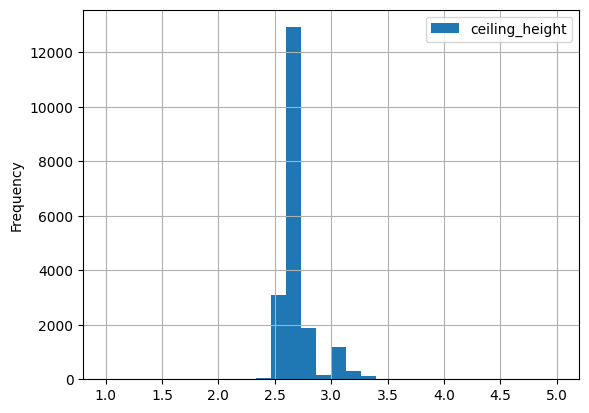

In [30]:
display(good['ceiling_height'].describe())
good.plot(y='ceiling_height', kind='hist', range=(1,5), bins=30, grid=True)

count    19710.000000
mean       178.373212
std        217.284990
min          1.000000
25%         44.000000
50%         94.000000
75%        227.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:ylabel='Frequency'>

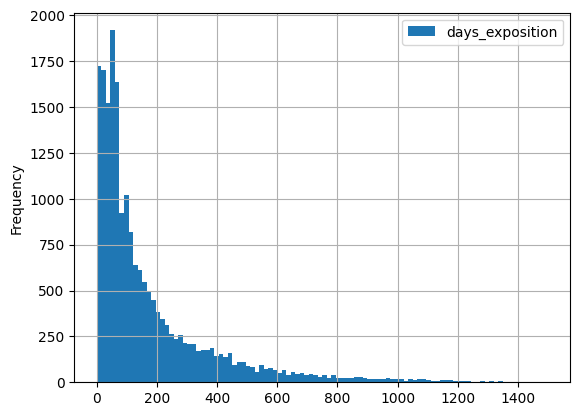

In [31]:
display(good['days_exposition'].describe())
good.plot(y='days_exposition', kind='hist', range=(0, 1500), bins=100, grid=True)

#### Вывод

Как можно заметить, количество аномальных значений действительно сократилось, и в новом датафрейме данные стали принимать более опрятный вид.

#### Зависимость цены от ряда факторов

In [32]:
matrix = good[['last_price', 'total_area', 'rooms', 'floor_cat', 'first_day_exposition', 'city_centers_nearest']]
matrix.head()

,last_price,total_area,rooms,floor_cat,first_day_exposition,city_centers_nearest
0,3350000.0,40.4,1,First,2018-12-04,18603.0
1,5196000.0,56.0,2,Other,2015-08-20,13933.0
2,64900000.0,159.0,3,Other,2015-07-24,6800.0
3,10000000.0,100.0,2,Other,2018-06-19,8098.0
4,2890000.0,30.4,1,Other,2018-09-10,NaN


,last_price,total_area,rooms,city_centers_nearest
last_price,1.000000,0.695675,0.386337,-0.263340
total_area,0.695675,1.000000,0.764251,-0.209221
rooms,0.386337,0.764251,1.000000,-0.139787
city_centers_nearest,-0.263340,-0.209221,-0.139787,1.000000


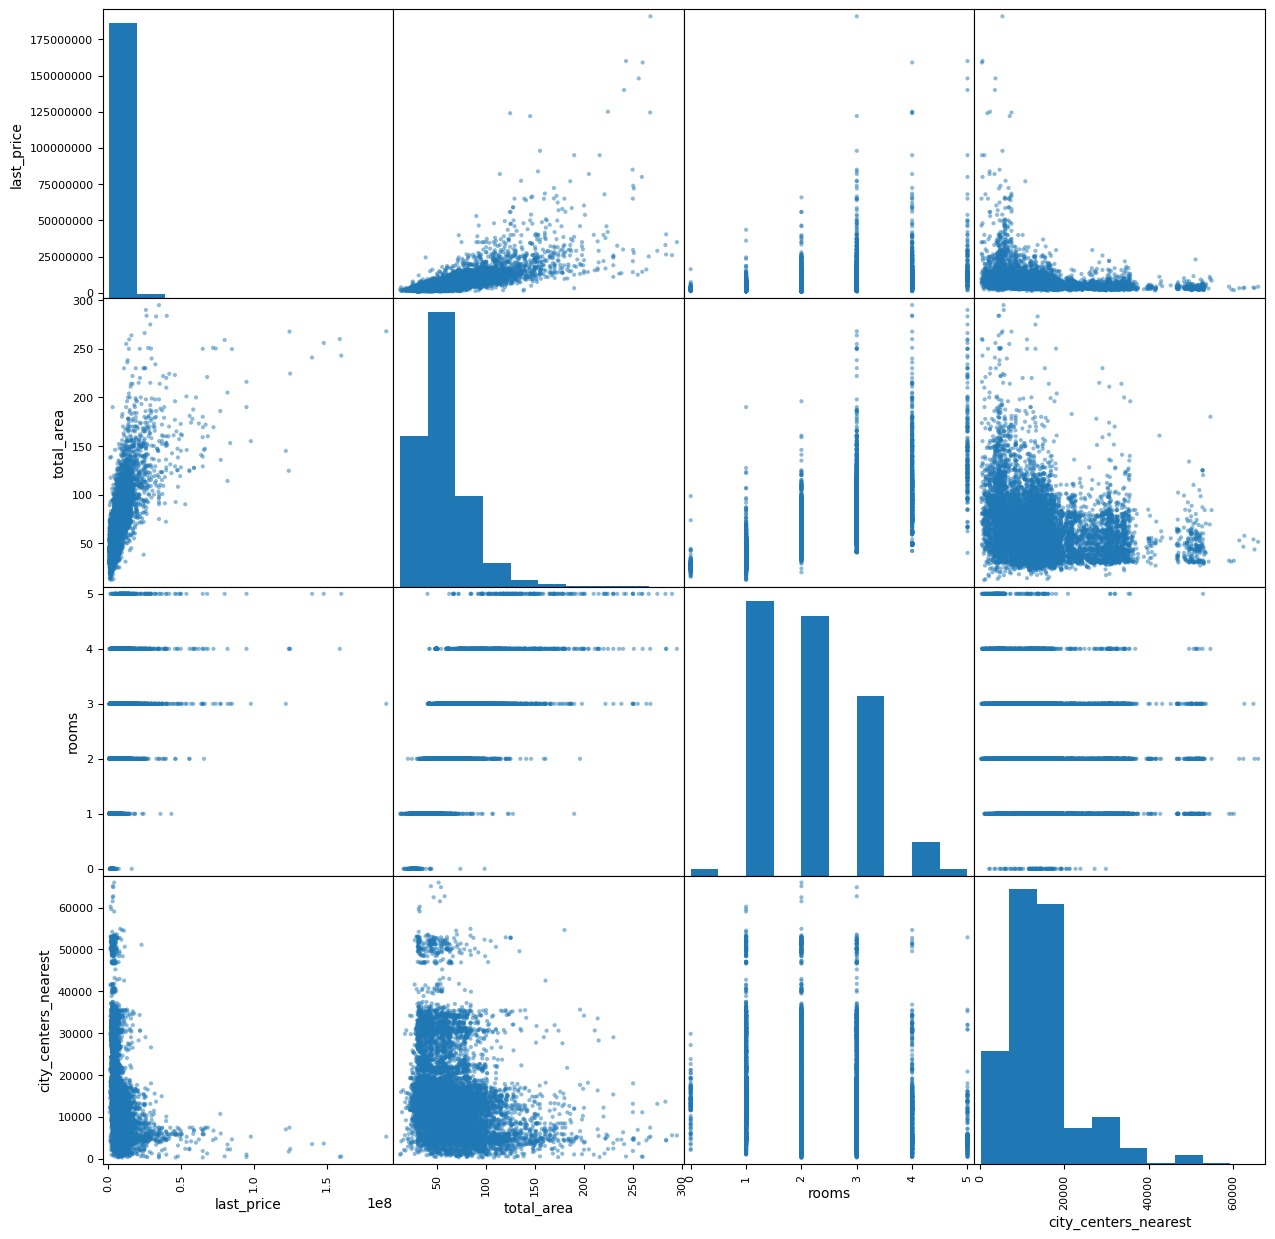

In [33]:
pd.plotting.scatter_matrix(matrix, figsize=(15, 15))
matrix.corr()

Проанализировав диаграммы рассеяния и матрицу корреляции, можно увидеть, что цена квартиры прежде всего зависит от ее площади и количества комнат (стоит обратить внимание, что количество комнат напрямую зависит от площади квартиры). Наибольшая часть квартир имеет площадь до 150 квадратных метров и стоимость до 20 млн. Интересно, что и квартиры с пятью комнатами, и студии (квартиры с нулевым значением комнат) встречаются в основном в пределах до 40 км от центра, а также то, что большая часть недорогих и небольших квартир находится в 20 км от центра.

In [34]:
date_floor_matrix = good[['last_price', 'weekday', 'weekday_index', 'floor_cat']]
date_floor_matrix['month'] = (good['first_day_exposition'].dt.month).astype('int')
date_floor_matrix['year'] = (good['first_day_exposition'].dt.year).astype('int')
date_floor_matrix.head()

C:\Users\polin\AppData\Local\Temp\ipykernel_88204\334101272.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_floor_matrix['month'] = (good['first_day_exposition'].dt.month).astype('int')
C:\Users\polin\AppData\Local\Temp\ipykernel_88204\334101272.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_floor_matrix['year'] = (good['first_day_exposition'].dt.year).astype('int')


,last_price,weekday,weekday_index,floor_cat,month,year
0,3350000.0,Tuesday,1,First,12,2018
1,5196000.0,Thursday,3,Other,8,2015
2,64900000.0,Friday,4,Other,7,2015
3,10000000.0,Tuesday,1,Other,6,2018
4,2890000.0,Monday,0,Other,9,2018


In [35]:
def floor (category):
    if category == 'First':
        return '1'
    if category == 'Last':
        return '2'
    return '0'

date_floor_matrix['floor_cat_index'] = date_floor_matrix['floor_cat'].apply(floor).astype('int')
date_floor_matrix.head()

C:\Users\polin\AppData\Local\Temp\ipykernel_88204\3439107799.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_floor_matrix['floor_cat_index'] = date_floor_matrix['floor_cat'].apply(floor).astype('int')


,last_price,weekday,weekday_index,floor_cat,month,year,floor_cat_index
0,3350000.0,Tuesday,1,First,12,2018,1
1,5196000.0,Thursday,3,Other,8,2015,0
2,64900000.0,Friday,4,Other,7,2015,0
3,10000000.0,Tuesday,1,Other,6,2018,0
4,2890000.0,Monday,0,Other,9,2018,0


In [36]:
years = pd.pivot_table(date_floor_matrix, index='year', values='last_price', aggfunc='median')
years.columns = ['median_price']
months = pd.pivot_table(date_floor_matrix, index='month', values='last_price', aggfunc='median')
months.columns = ['median_price']
days = pd.pivot_table(date_floor_matrix, index='weekday', values='last_price', aggfunc='median')
days.columns = ['median_price']
floor = pd.pivot_table(date_floor_matrix, index='floor_cat', values='last_price', aggfunc='median')
floor.columns = ['median_price']

display(years, months, days, floor)

,median_price
year,
2014,6750000.0
2015,5100000.0
2016,4485000.0
2017,4410000.0
2018,4490000.0
2019,4740000.0


,median_price
month,
1,4500000.0
2,4500000.0
3,4450000.0
4,4550000.0
5,4500000.0
6,4350000.0
7,4450000.0
8,4500000.0
9,4600000.0


,median_price
weekday,
Friday,4450000.0
Monday,4477500.0
Sathurday,4500000.0
Sunday,4450000.0
Thursday,4500000.0
Tuesday,4550000.0
Wednesday,4500000.0


,median_price
floor_cat,
First,3850000.0
Last,4200000.0
Other,4650000.0


<AxesSubplot:xlabel='floor_cat'>

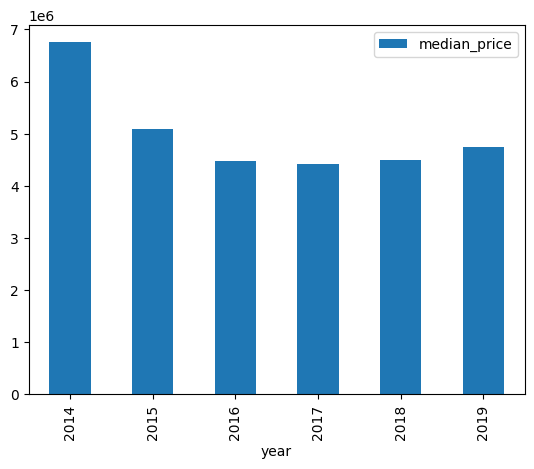

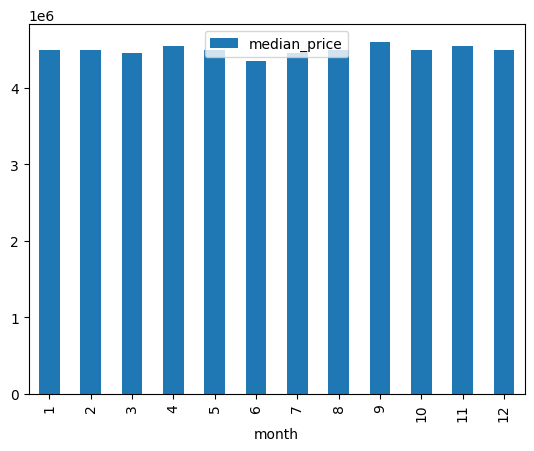

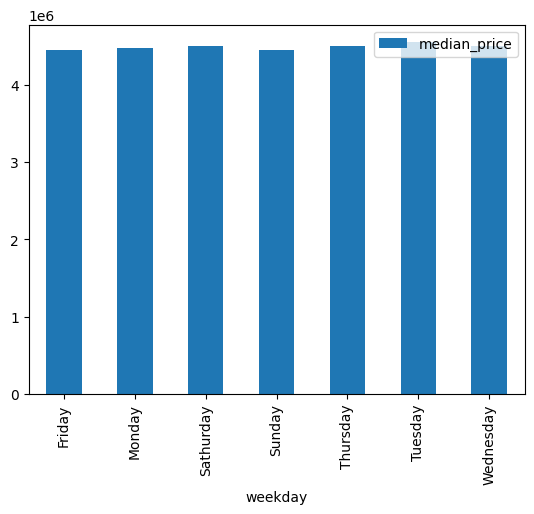

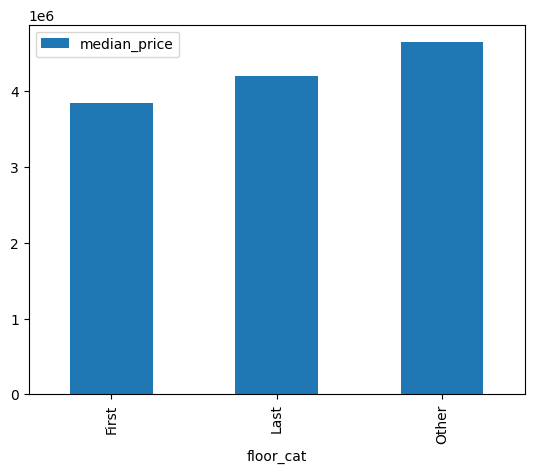

In [37]:
years.plot(y='median_price', kind='bar')
months.plot(y='median_price', kind='bar')
days.plot(y='median_price', kind='bar')
floor.plot(y='median_price', kind='bar')

О цене квартир на первом и последнем этаже можно сказать следующее: из-за близости подвалов, плохой звукоизоляции и худшей приватности на первых этажах и из-за возможных протечек крыши на последних, цена на эти квартиры ниже. Также, можно наблюдать небольшой спад продаж в июне.

0.0027971360596084132

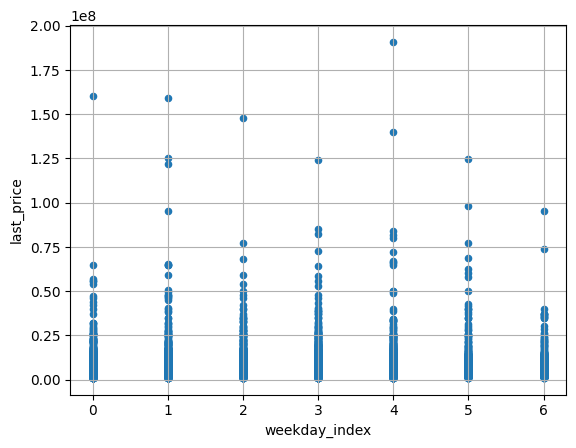

In [38]:
date_floor_matrix.plot(x='weekday_index', y='last_price', kind='scatter', grid=True)
display(date_floor_matrix['last_price'].corr(date_floor_matrix['weekday_index']))

0.00682289710217759

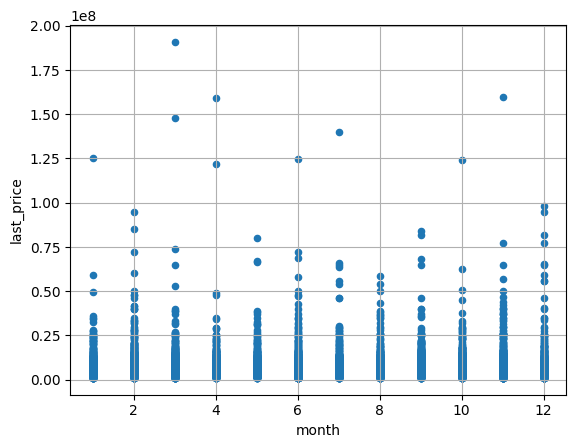

In [39]:
date_floor_matrix.plot(x='month', y='last_price', kind='scatter', grid=True)
display(date_floor_matrix['last_price'].corr(date_floor_matrix['month']))

Можно заметить, что июле есть спад продаж квартир, цена которых составляла от 33 млн.

-0.07306217573649941

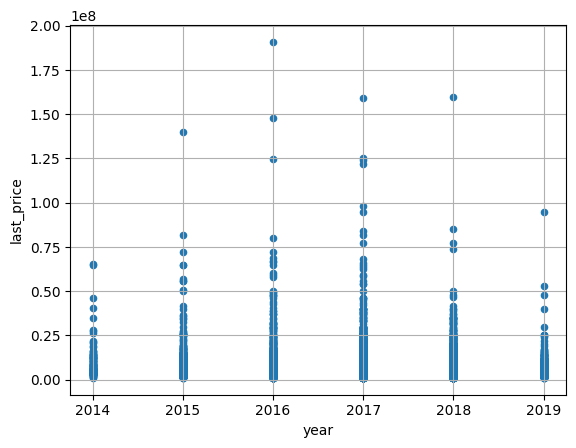

In [40]:
date_floor_matrix.plot(x='year', y='last_price', kind='scatter', grid=True)
display(date_floor_matrix['last_price'].corr(date_floor_matrix['year']))

Наиболее равномерно продажи распределились в 2017 и 2018 годах, а в 2014 и 2019 напротив - объявлений, как будто, было меньше. Однако, не стоит забывать, что до 2014 года Яндекс.Недвижимость была исключительно сайтом-агрегатором, и только в конце 2014 перешла к самостоятельному размещению объявлений на своей платформе. Также, можно предположить, что на момент изъятия данных, 2019 год был текущим, поэтому, данных на него оказалось меньше, чем на предыдущие.

Рассмотрим данные для каждого года:



<AxesSubplot:title={'center':'2019'}, xlabel='month'>

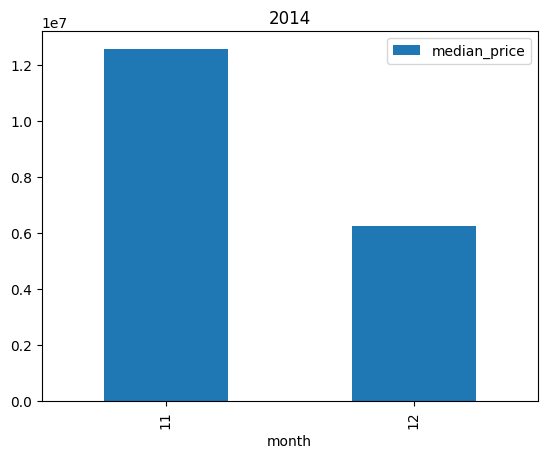

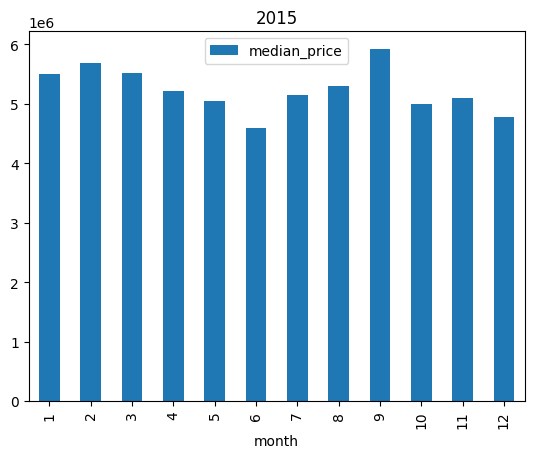

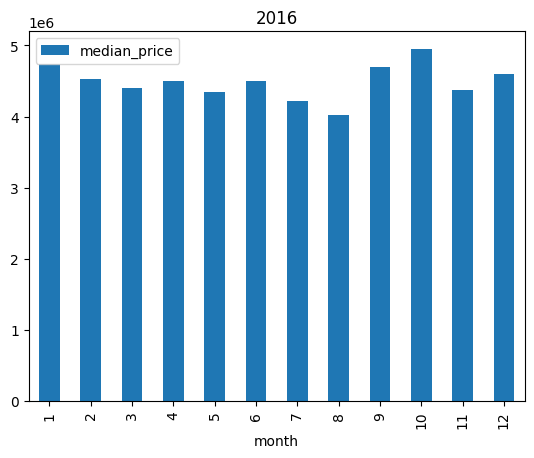

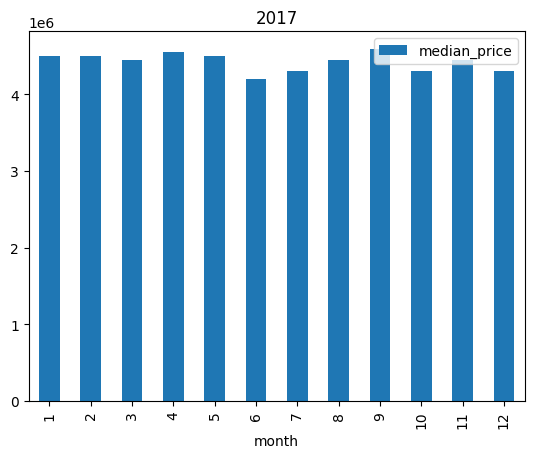

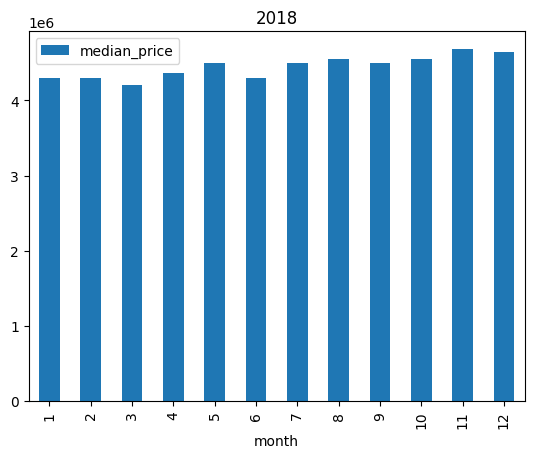

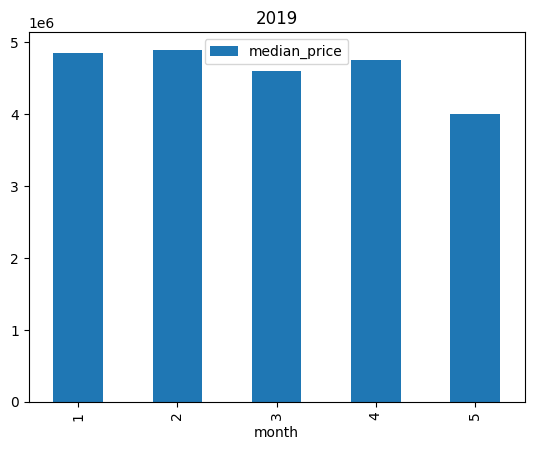

In [41]:
year_2014 = date_floor_matrix.query('year == 2014')
year_2015 = date_floor_matrix.query('year == 2015')
year_2016 = date_floor_matrix.query('year == 2016')
year_2017 = date_floor_matrix.query('year == 2017')
year_2018 = date_floor_matrix.query('year == 2018')
year_2019 = date_floor_matrix.query('year == 2019')

months_2014 = pd.pivot_table(year_2014, index='month', values='last_price', aggfunc='median')
months_2014.columns = ['median_price']
months_2015 = pd.pivot_table(year_2015, index='month', values='last_price', aggfunc='median')
months_2015.columns = ['median_price']
months_2016 = pd.pivot_table(year_2016, index='month', values='last_price', aggfunc='median')
months_2016.columns = ['median_price']
months_2017 = pd.pivot_table(year_2017, index='month', values='last_price', aggfunc='median')
months_2017.columns = ['median_price']
months_2018 = pd.pivot_table(year_2018, index='month', values='last_price', aggfunc='median')
months_2018.columns = ['median_price']
months_2019 = pd.pivot_table(year_2019, index='month', values='last_price', aggfunc='median')
months_2019.columns = ['median_price']

months_2014.plot(y='median_price', kind='bar', title = '2014')
months_2015.plot(y='median_price', kind='bar', title = '2015')
months_2016.plot(y='median_price', kind='bar', title = '2016')
months_2017.plot(y='median_price', kind='bar', title = '2017')
months_2018.plot(y='median_price', kind='bar', title = '2018')
months_2019.plot(y='median_price', kind='bar', title = '2019') 

#### Вывод

Прежде всего, цена квартиры зависит от ее размера - чем квартира больше, тем выше ее стоимость. Квартиры на первом этаже в основном находятся в ценовом сегменте до 25 млн, в то же время, квартиры на последнем этаже эсть во всех ценовых сегментах. Относительно равномерности продаж можно сказать следующее - квартиры до 30 млн продаются всегда, независимо от дня недели, месяца или года, в то же время можно заметить рост числа покупок квартир, стоимостью более 30 млн в 2017-18 годах.

#### Топ-10 населенных пунктов

In [42]:
top_10 = good.pivot_table(index='locality_name', values = 'price_sqm', aggfunc=['count', 'mean'])
top_10.columns=['count', 'sqm']
top_10_df = top_10.sort_values(by='count', ascending=False).head(10)
top_10_df

,count,sqm
locality_name,,
Санкт-Петербург,13130,110750.659650
посёлок Мурино,515,85791.431178
посёлок Шушары,407,77984.516786
Всеволожск,335,68515.952198
Колпино,306,74789.799026
посёлок Парголово,301,89672.150523
деревня Кудрово,299,92473.547576
Пушкин,297,101258.302445
Гатчина,266,68152.920324


In [43]:
top_10_df.sort_values(by='sqm', ascending=False)

,count,sqm
locality_name,,
Санкт-Петербург,13130,110750.659650
Пушкин,297,101258.302445
деревня Кудрово,299,92473.547576
посёлок Парголово,301,89672.150523
посёлок Мурино,515,85791.431178
посёлок Шушары,407,77984.516786
Колпино,306,74789.799026
Всеволожск,335,68515.952198
Гатчина,266,68152.920324


<AxesSubplot:xlabel='locality_name'>

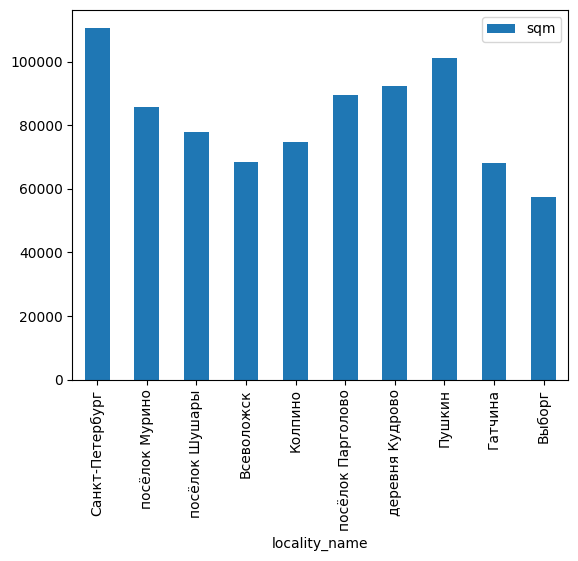

In [44]:
top_10_df.plot(y='sqm', kind='bar')

<AxesSubplot:xlabel='locality_name'>

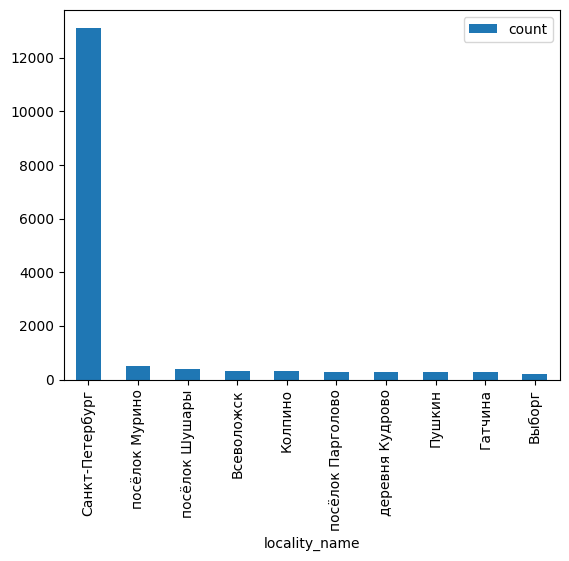

In [45]:
top_10_df.plot(y='count', kind='bar')

#### Вывод

Абсолютным лидером является Санкт-Петербург - 13027 объявлений и 108853 за квадратный метр. Второе место по числу объявлений занимает поселок Шушары, а по цене - Пушкин, третье - Колпино и Сестрорецк соответственно. Ломоносов занимает предпоследнее место по количеству объявлений (последнее занимает Кронштадт) и последнее по ценам.

#### Расстояние до центра: Санкт-Петербурга

Создадим срез данных по городу и рассчитаем стоимость на километр:

,locality_name,first_day_exposition,weekday,weekday_index,days_exposition,last_price,price_sqm,ceiling_height,total_area,living_area,...,kitchen_area,kitchen_to_total,rooms,floors_total,floor,floor_cat,studio,open_plan,city_centers_nearest,price_km
0,Санкт-Петербург,2015-08-20,Thursday,3,558,5196000.0,92785.714286,2.6,56.00,34.3,...,8.3,0.1,2,5,4,Other,False,False,13933,0.372928
1,Санкт-Петербург,2015-07-24,Friday,4,424,64900000.0,408176.100629,2.6,159.00,NaN,...,NaN,NaN,3,14,9,Other,False,False,6800,9.544118
2,Санкт-Петербург,2018-06-19,Tuesday,1,121,10000000.0,100000.000000,3.0,100.00,32.0,...,41.0,0.4,2,14,13,Other,False,False,8098,1.234873
3,Санкт-Петербург,2017-02-26,Sunday,6,289,5400000.0,88524.590164,2.5,61.00,43.6,...,6.5,0.1,3,9,7,Other,False,False,15008,0.359808
4,Санкт-Петербург,2017-11-16,Thursday,3,137,5050000.0,127525.252525,2.7,39.60,20.3,...,8.5,0.2,1,12,3,Other,False,False,13878,0.363885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13125,Санкт-Петербург,2019-04-01,Monday,0,23,9200000.0,91089.108911,3.0,101.00,63.0,...,15.0,0.1,3,15,12,Other,False,False,14428,0.637649
13126,Санкт-Петербург,2018-02-28,Wednesday,2,29,3550000.0,100566.572238,2.9,35.30,16.3,...,9.1,0.3,1,15,4,Other,False,False,16081,0.220757
13127,Санкт-Петербург,2018-07-19,Thursday,3,15,5500000.0,105769.230769,2.6,52.00,31.0,...,6.0,0.1,2,5,2,Other,False,False,6263,0.878173
13128,Санкт-Петербург,2016-10-13,Thursday,3,519,9470000.0,129903.978052,2.8,72.90,40.3,...,10.6,0.1,2,25,7,Other,False,False,4489,2.109601


<AxesSubplot:xlabel='city_centers_nearest', ylabel='price_km'>

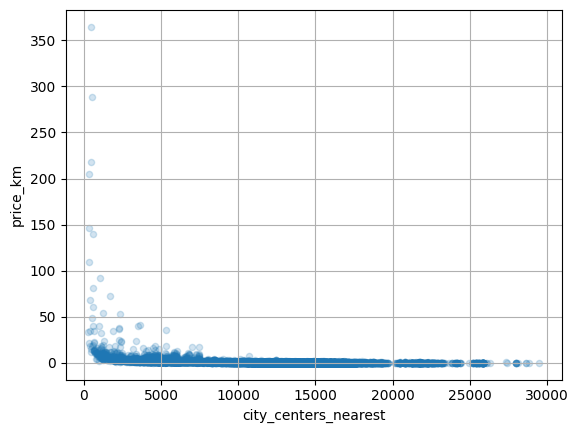

In [46]:
spb = good.query('locality_name == "Санкт-Петербург"').reset_index(drop=True)
spb['city_centers_nearest'] = spb['city_centers_nearest'].fillna(spb['city_centers_nearest'].median()).astype('int')
spb['price_km'] = spb['last_price']/spb['city_centers_nearest']/1000
display(spb)
spb.plot(x='city_centers_nearest', y='price_km', kind='scatter', grid=True, alpha=.2)

<AxesSubplot:xlabel='city_centers_nearest_km'>

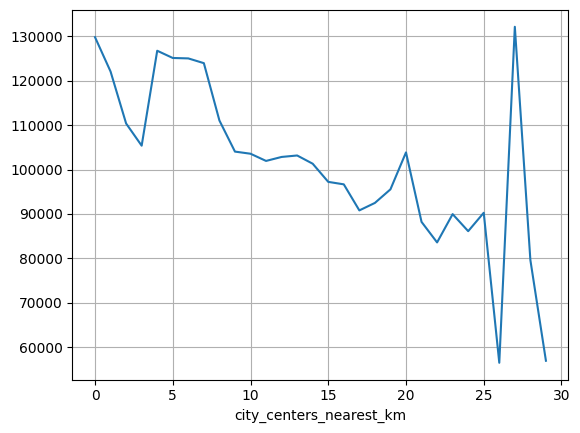

In [47]:
spb['city_centers_nearest_km'] = (spb['city_centers_nearest']/1000).astype(int)

spb.groupby('city_centers_nearest_km')['price_sqm'].median().plot(x='city_centers_nearest', y='price_km', grid=True)

Можно увидеть резкий скачок цен в районе от 0 до 2500, которые стабилизируются в районе 7-7,5 км. Примем это значение за центр города:

In [48]:
spb_center = spb.query('city_centers_nearest <= 7500').reset_index(drop=True)
spb_center

,locality_name,first_day_exposition,weekday,weekday_index,days_exposition,last_price,price_sqm,ceiling_height,total_area,living_area,...,kitchen_to_total,rooms,floors_total,floor,floor_cat,studio,open_plan,city_centers_nearest,price_km,city_centers_nearest_km
0,Санкт-Петербург,2015-07-24,Friday,4,424,64900000.0,408176.100629,2.6,159.0,NaN,...,NaN,3,14,9,Other,False,False,6800,9.544118,6
1,Санкт-Петербург,2015-10-31,Sathurday,5,265,6500000.0,66872.427984,2.6,97.2,46.5,...,0.2,2,3,1,First,False,False,2336,2.782534,2
2,Санкт-Петербург,2017-06-26,Monday,0,644,15500000.0,104026.845638,2.6,149.0,104.0,...,0.1,5,5,4,Other,False,False,3502,4.426042,3
3,Санкт-Петербург,2017-10-17,Tuesday,1,541,45000000.0,279503.105590,3.2,161.0,38.0,...,0.3,3,8,4,Other,False,False,6589,6.829564,6
4,Санкт-Петербург,2017-08-24,Thursday,3,609,7990000.0,107972.972973,2.6,74.0,43.0,...,0.3,2,4,4,Last,False,False,4288,1.863340,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2488,Санкт-Петербург,2017-05-12,Friday,4,621,10100000.0,129487.179487,3.3,78.0,48.6,...,0.1,3,5,5,Last,False,False,1113,9.074573,1
2489,Санкт-Петербург,2016-05-20,Friday,4,131,4250000.0,90425.531915,2.6,47.0,18.2,...,0.3,1,6,1,First,False,False,4946,0.859280,4
2490,Санкт-Петербург,2018-05-11,Friday,4,80,5250000.0,122093.023256,2.5,43.0,29.0,...,0.1,2,5,2,Other,False,False,7262,0.722941,7
2491,Санкт-Петербург,2018-07-19,Thursday,3,15,5500000.0,105769.230769,2.6,52.0,31.0,...,0.1,2,5,2,Other,False,False,6263,0.878173,6


#### Вывод

Мы получили срез данных, отражающий информацию о предложениях в центре Санкт-Петербурга.

#### Анализ квартир в центре

In [49]:
def floor (category):
    if category == 'First':
        return '1'
    if category == 'Last':
        return '2'
    return '0'

spb_filtered = spb_center[['total_area', 'last_price', 'weekday', 'floor_cat', 'rooms', 'ceiling_height', 'city_centers_nearest']]
spb_filtered['floor_index'] = spb_filtered['floor_cat'].apply(floor)
spb_filtered['month'] = (spb_center['first_day_exposition'].dt.month).astype('int')
spb_filtered['year'] = (spb_center['first_day_exposition'].dt.year).astype('int')
display(spb_filtered.sort_values(by='city_centers_nearest').head(10))
spb_filtered.info()

C:\Users\polin\AppData\Local\Temp\ipykernel_88204\2129215890.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb_filtered['floor_index'] = spb_filtered['floor_cat'].apply(floor)
C:\Users\polin\AppData\Local\Temp\ipykernel_88204\2129215890.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb_filtered['month'] = (spb_center['first_day_exposition'].dt.month).astype('int')
C:\Users\polin\AppData\Local\Temp\ipykernel_88204\2129215890.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy o

,total_area,last_price,weekday,floor_cat,rooms,ceiling_height,city_centers_nearest,floor_index,month,year
189,108.0,9590000.0,Tuesday,Other,2,3.3,287,0,5,2017
107,95.8,34878556.0,Tuesday,Other,2,2.6,318,0,12,2014
1171,92.4,46424072.0,Tuesday,Last,2,2.6,318,2,12,2014
1427,129.0,65000000.0,Monday,Other,3,2.6,318,0,9,2017
2313,72.0,7200000.0,Thursday,Other,2,3.1,329,0,12,2017
837,96.9,13500000.0,Monday,Other,3,3.2,387,0,8,2018
227,173.6,27000000.0,Thursday,Other,5,3.3,399,0,6,2015
269,80.0,7200000.0,Thursday,First,3,2.8,399,1,8,2017
44,216.0,95000000.0,Tuesday,Other,4,3.0,436,0,12,2017
1693,260.0,159000000.0,Tuesday,Other,4,2.6,436,0,4,2017


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2493 entries, 0 to 2492
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_area            2493 non-null   float64
 1   last_price            2493 non-null   float64
 2   weekday               2493 non-null   object 
 3   floor_cat             2493 non-null   object 
 4   rooms                 2493 non-null   int64  
 5   ceiling_height        2493 non-null   float64
 6   city_centers_nearest  2493 non-null   int32  
 7   floor_index           2493 non-null   object 
 8   month                 2493 non-null   int32  
 9   year                  2493 non-null   int32  
dtypes: float64(3), int32(3), int64(1), object(3)
memory usage: 165.7+ KB


<AxesSubplot:title={'center':'Дни'}, xlabel='weekday'>

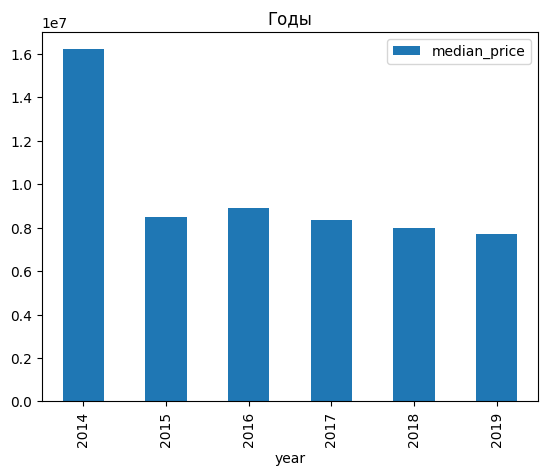

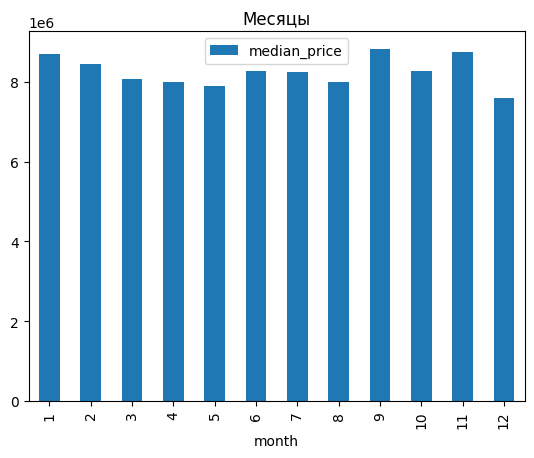

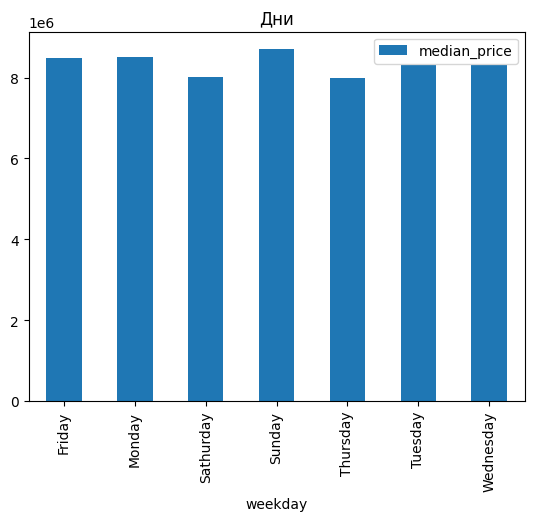

In [50]:
spb_time_matrix = spb_filtered[['last_price', 'weekday', 'month', 'year']]
spb_time_year = pd.pivot_table(spb_time_matrix, index='year', values='last_price', aggfunc='median')
spb_time_year.columns = ['median_price']
spb_time_year.plot(y='median_price', kind='bar', title = 'Годы')
spb_time_month = pd.pivot_table(spb_time_matrix, index='month', values='last_price', aggfunc='median')
spb_time_month.columns = ['median_price']
spb_time_month.plot(y='median_price', kind='bar', title = 'Месяцы')
spb_time_day = pd.pivot_table(spb_time_matrix, index='weekday', values='last_price', aggfunc='median')
spb_time_day.columns = ['median_price']
spb_time_day.plot(y='median_price', kind='bar', title = 'Дни')

Посмотрим на статистику по месяцам отдельно для каждого года:

,last_price,city_centers_nearest,ceiling_height,rooms
last_price,1.000000,-0.031430,0.075744,0.339241
city_centers_nearest,-0.031430,1.000000,-0.156053,-0.180094
ceiling_height,0.075744,-0.156053,1.000000,0.166587
rooms,0.339241,-0.180094,0.166587,1.000000


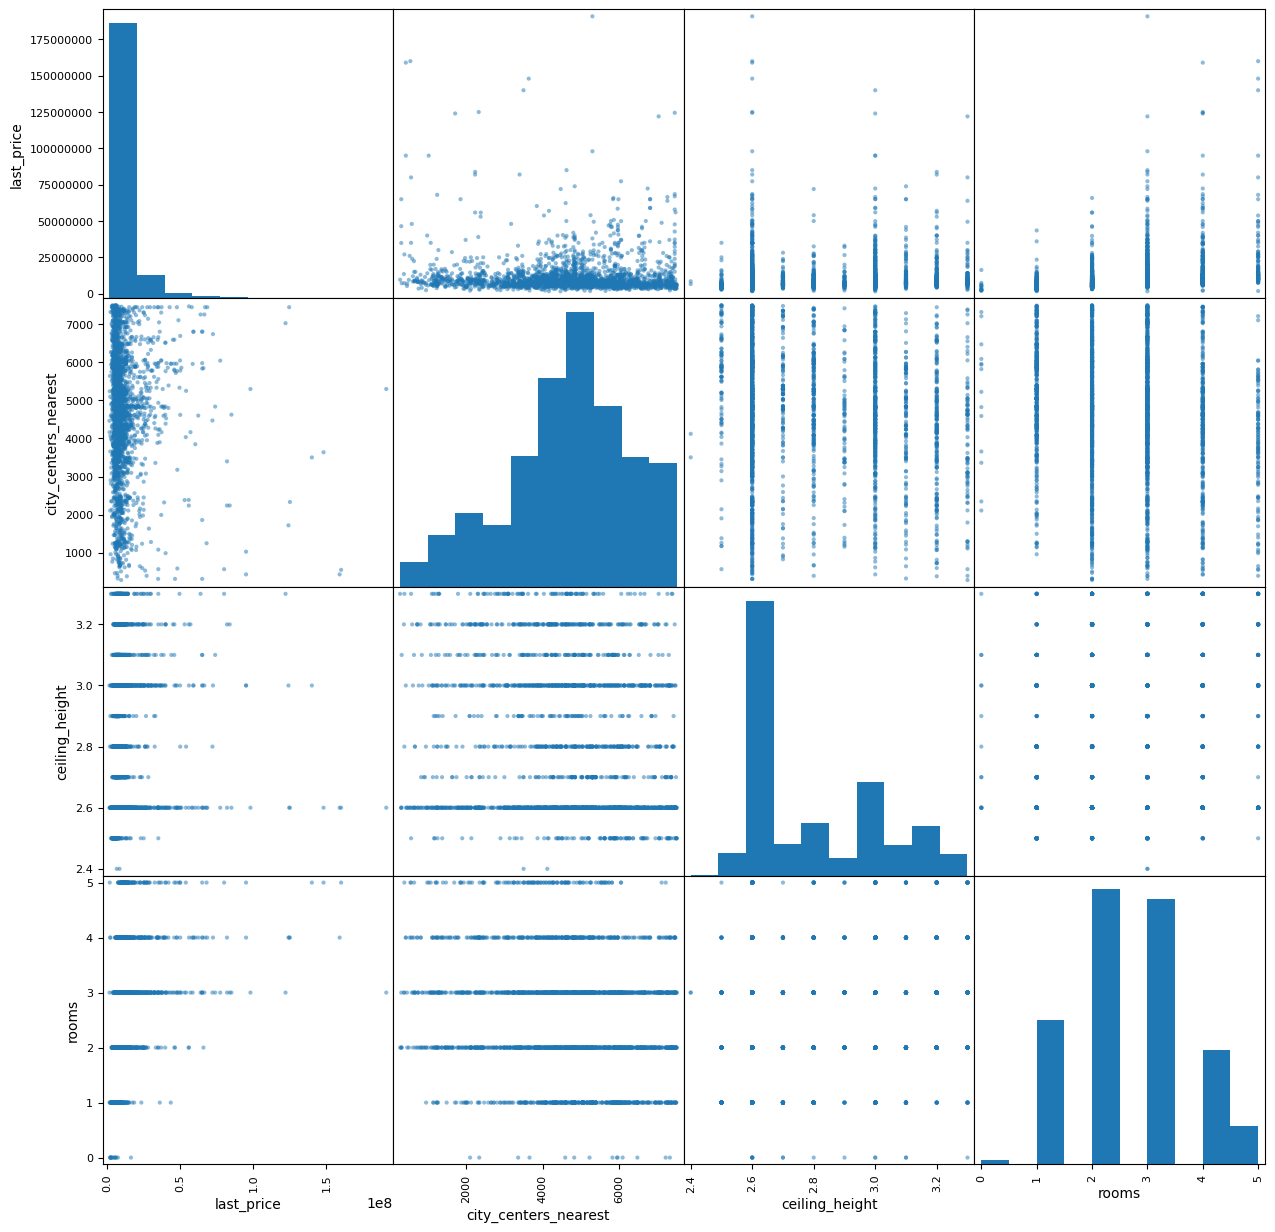

In [51]:
spb_place_matrix = spb_filtered[['last_price', 'city_centers_nearest', 'floor_index', 'ceiling_height', 'rooms']]
pd.plotting.scatter_matrix(spb_place_matrix, figsize=(15, 15))
spb_place_matrix.corr()

#### Вывод

Как можно заметить, данные и графики не сильно отличаются от аналогичных, отражаюих общую статистику. Мы видим, что цена на однокомнатные квартиры и студии не превышает 20 млн, в этом же ценовом сегменте находится и большинство значений в графике высоты потолков. Можно заметить большие значения в 2014 году - скорее всего, это связано с тем, что в этом году платформа только начинала свою работу, и поначалу там были только объявления из Санкт-Петербурга.

## Общий вывод

Данные из исходного датасета были очищены, отструктурированы и подготовлены для анализа:

* сменили формат данных даты и времени
* мы избавились от пропусков либо удалив, либо заменив их на подходящие значения
* создали отфильтрованную таблицу для большей наглядности

В ходе анализа было установлено:

* цена квартиры прежде всего зависит именно от ее площади
* а также от количества комнат

В 2016 году на рынке недвижимости происходил резкий рост продаж квартир с начала года, пик которого пришелся на июнь, затем последовал спад, 2017 год был наиболее стабильным, а в мае 2018 наблюдается отсутствие продаж квартир стоимостью более 15 млн. Мы также получили топ-10 населенных пунктов по количеству объявлений, и среди них выделили лидеров по стоимости квадратого метра.

Сантк-Петербург с огромным отрывом возглавляет оба списка:

* 13027 объявлений
* 108853 за квадратный метр

Также, мы более подробно проанализировали недвижимость в центре Санкт-Петербурга (за центр мы приняли значение до 7,5 км от центра на основе данных, полученных из графика распределения цены на километр). 